In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
import pickle
import gzip

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X, y = pickle.load(gzip.open('/content/drive/My Drive/flatland/flatland_train.data', 'rb'))
y[y != 0] -= 2
#X = X/255. # nes pixel values oof

#for i in range(20):
#    plt.subplot(5, 4, i+1)
 #   plt.imshow(X[i]) 

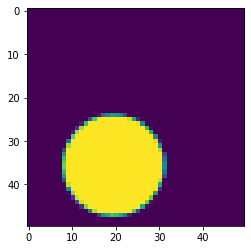

In [ ]:
plt.imshow(X[0])

In [ ]:
# neeficient kodas bet oh well
aug_X = []

for i in range(len(X)):
  rotated90 = np.array(list(zip(*X[i][::-1])))
  rotated180 = np.array(list(zip(*rotated90[::-1])))
  rotated270 = np.array(list(zip(*rotated180[::-1])))
  tr_0 = X[i].T
  tr_90 = np.array(list(zip(*tr_0[::-1])))
  tr_180 = np.array(list(zip(*tr_90[::-1])))
  tr_270 = np.array(list(zip(*tr_180[::-1])))


  aug_X.extend((rotated90, rotated180, rotated270, tr_0, tr_90, tr_180, tr_270))


In [ ]:
X = np.concatenate((X, aug_X))

In [ ]:
aug_y = []

for i in range(len(y)):
  aug_y.extend((y[i], y[i], y[i], y[i], y[i], y[i], y[i]))

In [ ]:
y = np.concatenate((y, aug_y))

In [ ]:
# X[1].shape
X = X.reshape(X.shape[0], 50, 50, 1) / 255 

In [ ]:
# pakeisti input data tam papildomam testui augmentation
# cnn su jau pagaminto cnn pradzia  faaakin didelis modelis gitas sako ne...
# paziureti ar veikia tensorflow colabe va sitas liko

In [ ]:
# Naujas modelis su cnn

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D, MaxPool2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
#model.add(BatchNormalization(axis=-1)) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.35))

model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))

#model.add(BatchNormalization(axis=-1))

#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


opt = Adam(lr=3e-4) #0.001

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)      

In [ ]:
#loss = model.fit(datagen.flow(X, y, batch_size=32),  batch_size = 256, epochs=20) # datagen.flow(x_train, y_train, batch_size=32)  
loss = model.fit(X, y,  batch_size = 1024, epochs=10 , validation_split=0.2)

Accuracy on test set - 99.94%


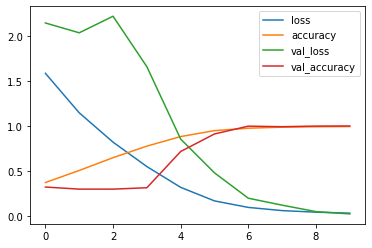

In [ ]:
pd.DataFrame(loss.history).plot()
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

In [ ]:
model.save('model.h5')

In [ ]:

#Train set accuracy 99.99% Validation set accuracy 99.98% Test set accuracy 99.84%